# Predicting On-time Delivery of Online Purchases
## Part III-A: Modeling - Logistic Regression, X1, X2
## AAI-510 Team 7 Final Project

Team 7:  Ken Devoe, Tyler Foreman, Geoffrey Fadera

University of San Diego, Applied Artificial Intelligence

Date:  June 24, 2024

GitHub Repository: https://github.com/kdevoe/aai510-group7

## Imports

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Load Preprocessed Data

In [243]:
# train data
X_train = pd.read_csv('./data/x_train.csv')
y_train = np.ravel(pd.read_csv('./data/y_train.csv'))

# val data
X_val = pd.read_csv('./data/x_val.csv')
y_val = np.ravel(pd.read_csv('./data/y_val.csv'))

# test data
X_test = pd.read_csv('./data/x_test.csv')
y_test = np.ravel(pd.read_csv('./data/y_test.csv'))

In [244]:
X_val.shape

(1100, 17)

In [245]:
X_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,-0.923799,5,-0.669915,-0.372735,1,-0.393292,0.306355,0,0,0,0,1,0,0,1,1,0
1,1.704465,3,-0.170550,0.283954,2,-0.640133,0.527109,1,0,0,0,0,0,0,1,1,0
2,-1.799887,5,1.389964,-0.372735,2,-0.455002,-1.591153,0,0,0,1,0,0,0,1,0,1
3,0.828377,5,0.183166,-1.029424,2,-0.578423,0.400527,0,0,1,0,0,0,0,1,0,1
4,1.704465,3,1.785294,0.283954,1,-0.578423,-1.213241,0,0,1,0,0,1,0,0,1,0


In [246]:
X_train.tail()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
8794,-0.923799,5,1.348350,-1.029424,1,-0.393292,0.602325,0,0,1,0,0,0,1,0,1,0
8795,0.828377,5,-0.482653,0.283954,2,-0.269872,1.034660,0,0,0,0,1,0,1,0,1,0
8796,-0.047711,2,-1.522996,-1.029424,2,-0.701843,1.326961,1,0,0,0,0,0,0,1,1,0
8797,0.828377,3,-1.377348,1.597332,2,1.334592,-1.605217,1,0,0,0,0,0,0,1,1,0
8798,-0.047711,3,-1.148472,-0.372735,0,-0.701843,0.550347,0,0,1,0,0,1,0,0,1,0


In [247]:
X_val.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,-0.047711,2,1.223509,-1.029424,2,-0.701843,0.231751,0,0,0,1,0,0,1,0,1,0
1,-0.047711,2,-0.420233,-0.372735,2,-0.393292,0.692216,1,0,0,0,0,0,1,0,0,1
2,-0.047711,1,-0.295391,-1.029424,1,-0.640133,0.683655,0,0,0,1,0,0,0,1,0,1
3,-0.923799,3,-0.149744,-0.372735,2,-0.393292,0.821244,0,0,0,1,0,1,0,0,0,1
4,0.828377,5,0.786565,0.940643,2,-0.331582,-1.071983,1,0,0,0,0,1,0,0,0,1


## Model 1: Logistic Regression

A simple Logistic Regression is used to establish a baseline performance. 
Default parameter values are used to train this model without cross-validation.

### Model 1: Training using default parameters values

In [248]:
# create model instance
model1 = []
model1 = LogisticRegression(solver='liblinear', random_state=0)

# Since other models are going to be tuned

X_trainval = []
y_trainval = []
X_trainval = pd.concat([X_train, X_val])
y_trainval = np.concatenate((y_train, y_val))

#fit the model using the combined training and validation data
model1.fit(X_trainval, y_trainval)


LogisticRegression(random_state=0, solver='liblinear')

In [249]:
model1.coef_

array([[-0.12325535,  0.0263022 , -0.1006859 , -0.11973755, -0.10688355,
         1.80445867, -0.38472215,  0.02924908,  0.14205931,  0.11541173,
         0.10900846,  0.09918754,  0.17164613,  0.16281543,  0.16045455,
         0.21895647,  0.27595965]])

### Model1: Performance Evaluation

In [251]:
y_pred1 = model1.predict(X_test)

In [252]:
cnf_matrix1 = confusion_matrix(y_test, y_pred1)
cnf_matrix1

array([[257, 193],
       [212, 438]])

<Axes: >

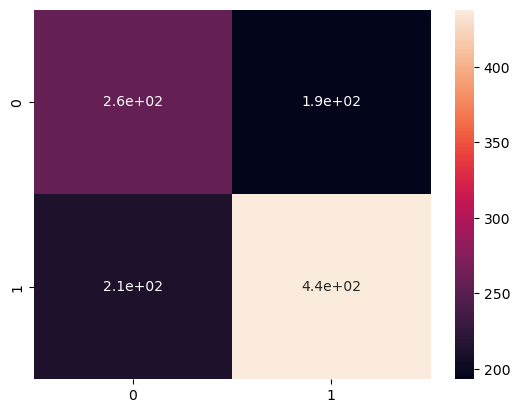

In [253]:
sns.heatmap(cnf_matrix1, annot=True)

<Axes: >

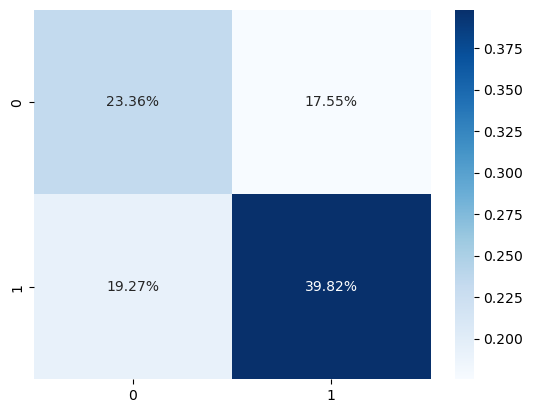

In [254]:
sns.heatmap(cnf_matrix1/np.sum(cnf_matrix1), annot=True, 
            fmt='.2%', cmap='Blues')

In [255]:
print(classification_report(y_test, y_pred1))#, target_names=target_names))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56       450
           1       0.69      0.67      0.68       650

    accuracy                           0.63      1100
   macro avg       0.62      0.62      0.62      1100
weighted avg       0.63      0.63      0.63      1100



In [256]:
import statsmodels.api as sm

logit_model=sm.Logit(y_trainval, X_trainval)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.545936
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 9899
Model:                          Logit   Df Residuals:                     9883
Method:                           MLE   Df Model:                           15
Date:                Thu, 06 Jun 2024   Pseudo R-squ.:                  0.1901
Time:                        05:22:26   Log-Likelihood:                -5404.2
converged:                       True   LL-Null:                       -6672.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Customer_care_calls        -0.1231      0.026     -4.755      0.000      -0.174   